```
Topic:    Challenge Set 7
Subject:  Classification
Date:     02/13/2017
Name:     Prashant Tatineni
```

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.learning_curve import learning_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score

%matplotlib inline

**Challenge 1**

In [3]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', header=None)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [6]:
df.shape

(435, 17)

In [5]:
df = df.replace('y',1)
df = df.replace('n',0)

In [6]:
for i in range(1,17):
    df[i] = df[i].replace('?',(df[i].replace('?',np.nan)).mean())

**Challenge 2**

In [7]:
y = df[0]
X = df[[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=4444)

**Challenge 3**

In [38]:
accuracy = []

for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_test_predicted = knn.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_test_predicted))

In [39]:
max(accuracy)

0.93129770992366412

In [40]:
# k value giving highest accuracy
accuracy.index(max(accuracy)) + 1

6

**Challenge 4**

In [11]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_test_predicted = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, y_test_predicted)
lr_accuracy

0.93893129770992367

**Challenge 5**

In [12]:
y.groupby(y).count()

0
democrat      267
republican    168
Name: 0, dtype: int64

([<matplotlib.axis.XTick at 0x11e75b110>,
 <a list of 2 Text xticklabel objects>)

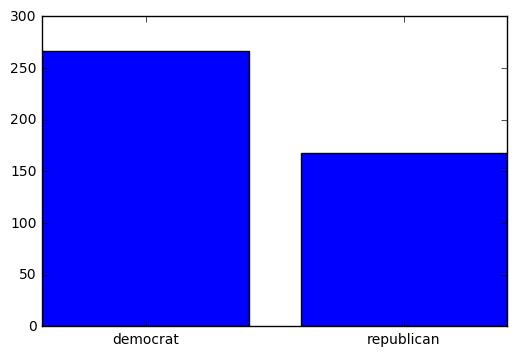

In [41]:
plt.bar([0,1],[267,168])
plt.xticks([0.4,1.4],['democrat','republican'])

In [14]:
y_predicted = ['democrat']*len(X)
dem_accuracy = accuracy_score(y, y_predicted)
dem_accuracy

0.61379310344827587

In [15]:
y_predicted = ['republican']*len(X)
rep_accuracy = accuracy_score(y, y_predicted)
rep_accuracy

0.38620689655172413

**Challenge 6**

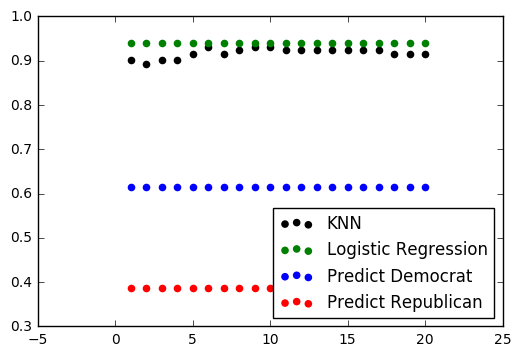

In [34]:
k = range(1,21)
plt.scatter(k, accuracy, color='k', label='KNN')
plt.scatter(k, [lr_accuracy]*20, color='g', label='Logistic Regression')
plt.scatter(k, [dem_accuracy]*20, color='b', label='Predict Democrat')
plt.scatter(k, [rep_accuracy]*20, color='r', label='Predict Republican')
plt.legend(loc=4)

**Challenge 7**

In [17]:
m, train_err, test_err = learning_curve(LogisticRegression(), X, y, cv=10)

In [18]:
m

array([ 39, 127, 215, 303, 391])

In [19]:
train_cv_err = np.mean(train_err, axis=1)
test_cv_err = np.mean(test_err, axis=1)

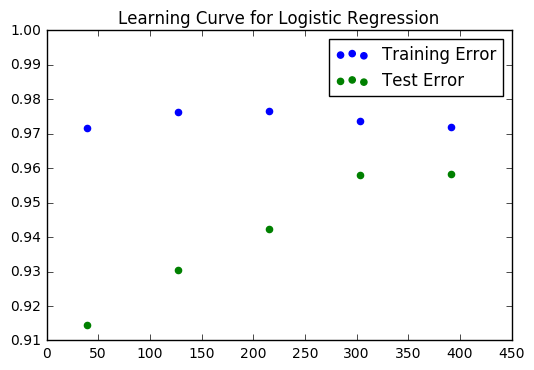

In [25]:
plt.scatter(m, train_cv_err, color='b', label='Training Error')
plt.scatter(m, test_cv_err, color='g', label='Test Error')
plt.title('Learning Curve for Logistic Regression')
plt.legend()

In [42]:
m, train_err, test_err = learning_curve(KNeighborsClassifier(n_neighbors=6), X, y, cv=10)
train_cv_err = np.mean(train_err, axis=1)
test_cv_err = np.mean(test_err, axis=1)

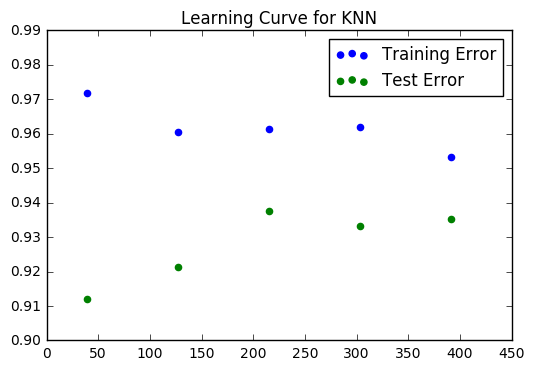

In [43]:
plt.scatter(m, train_cv_err, color='b', label='Training Error')
plt.scatter(m, test_cv_err, color='g', label='Test Error')
plt.title('Learning Curve for KNN')
plt.legend()

**Challenge 8**

Gaussian Naive Bayes

In [48]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_test_predicted = nb.predict(X_test)
nb_accuracy = accuracy_score(y_test, y_test_predicted)
nb_accuracy

0.93893129770992367

Support Vector Machine

In [49]:
svm = SVC()
svm.fit(X_train, y_train)
y_test_predicted = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_test_predicted)
svm_accuracy

0.95419847328244278

Decision Tree

In [50]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_test_predicted = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_test_predicted)
dt_accuracy

0.93893129770992367

Random Forest

In [52]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_test_predicted = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_test_predicted)
rf_accuracy

0.95419847328244278

**Challenge 9**

In [66]:
np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=6), X, y, cv=10))

0.9352839021443673

In [68]:
np.mean(cross_val_score(LogisticRegression(), X, y, cv=10))

0.95822762508809023

In [71]:
np.mean(cross_val_score(GaussianNB(), X, y, cv=10))

0.93977398570421822

In [72]:
np.mean(cross_val_score(SVC(), X, y, cv=10))

0.95828047921071191

In [73]:
np.mean(cross_val_score(DecisionTreeClassifier(), X, y, cv=10))

0.93301620859760404

In [83]:
np.mean(cross_val_score(RandomForestClassifier(), X, y, cv=10))

0.95357646229739257

**Challenge 10**

In [119]:
vp = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', header=None)

In [120]:
vp = vp.replace('y',1)
vp = vp.replace('n',0)
vp.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,0,1,0,1,1,1,0,0,0,1,?,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,?
2,democrat,?,1,1,?,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,?,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,?,1,1,1,1


Vote 16 (the last column) has the most '?'; let's try to predict that one.

In [134]:
for i in range(1,17):
    vp[i] = vp[i].replace('?',vp[i].mode()[0])

In [135]:
vy = vp[16]
vX = vp[[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]]

In [136]:
np.mean(cross_val_score(LogisticRegression(), vX, vy, cv=10))

0.83210007047216339

**Challenge 11**

In [198]:
mv = pd.read_csv('2013_movies.csv')
mv.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


In [199]:
mv.shape

(100, 7)

In [200]:
ratings = mv.groupby('Rating')['Title'].count()

([<matplotlib.axis.XTick at 0x12053cb90>,
 <a list of 4 Text xticklabel objects>)

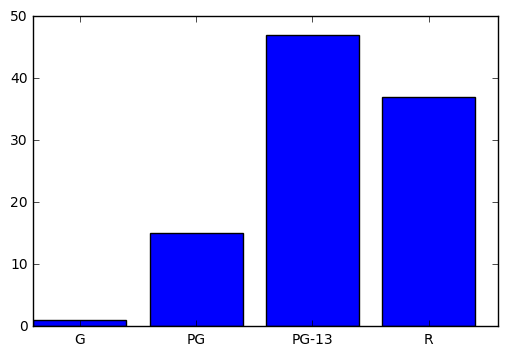

In [201]:
plt.bar(range(len(ratings.index)),ratings.values)
plt.xticks(np.array(range(len(ratings.index))) + .4,ratings.index)

In [260]:
model_mv = mv[['Rating','Budget','DomesticTotalGross','Runtime']].dropna()

In [261]:
y = model_mv['Rating']
X = model_mv[['Budget','DomesticTotalGross','Runtime']]

KNN

In [298]:
accuracy = []

for k in range(1,50):
    accuracy.append(np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=k), X, y, cv=15)))

In [299]:
max(accuracy)

0.5888888888888888

In [300]:
# k value giving highest accuracy
accuracy.index(max(accuracy)) + 1

5

Logistic Regression

In [297]:
np.mean(cross_val_score(LogisticRegression(), X, y, cv=15))

0.52000000000000002

In [296]:
np.mean(cross_val_score(LogisticRegression(multi_class='multinomial', solver='lbfgs'), X, y, cv=15))

0.52952380952380962

In [295]:
np.mean(cross_val_score(LogisticRegression(multi_class='multinomial', solver='newton-cg'), X, y, cv=15))

0.53396825396825387

In [311]:
lr = LogisticRegression(multi_class='multinomial', solver='newton-cg')
lr.fit(X,y)
lr.coef_

array([[  9.38013037e-09,   2.03975291e-09,  -1.32818653e-02],
       [  8.53493525e-09,  -1.02037039e-09,   6.18941340e-04],
       [ -1.79138121e-08,  -1.01870548e-09,   1.26629240e-02]])

Baseline Predictor

In [307]:
pg13_predictor = pd.Series(['PG-13']*89)

In [308]:
accuracy_score(y, pg13_predictor)

0.4606741573033708

**Challenge 12**

In [313]:
hab = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data', header=None)

In [316]:
hab.columns = ['age','yr','nodes','survived5']
hab.head()

,age,yr,nodes,survived5
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


Age - all patients

In [318]:
hab.age.mean()

52.45751633986928

In [319]:
hab.age.std()

10.80345234930328

Age - patients who survived 5+ yrs

In [327]:
hab.groupby('survived5')['age'].mean()[1]

52.017777777777781

In [328]:
hab.groupby('survived5')['age'].std()[1]

11.012154179929528

Age - patients survived < 5 yrs

In [329]:
hab.groupby('survived5')['age'].mean()[2]

53.679012345679013

In [330]:
hab.groupby('survived5')['age'].mean()[2]

53.679012345679013

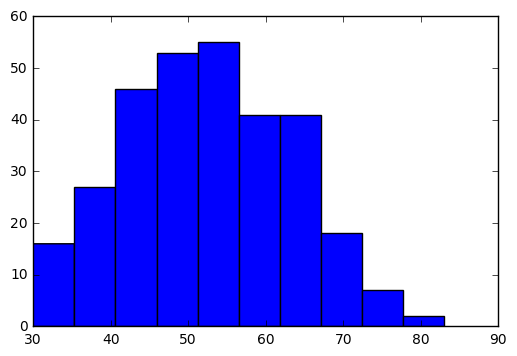

In [337]:
plt.hist(hab.age);

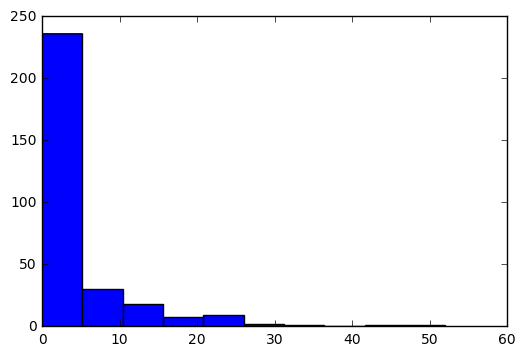

In [338]:
plt.hist(hab.nodes);

In [348]:
((hab.sort_values('yr')).yr).head()

305    58
258    58
253    58
37     58
40     58
Name: yr, dtype: int64

In [349]:
((hab.sort_values('yr', ascending=False)).yr).head()

53     69
90     69
201    69
24     69
142    69
Name: yr, dtype: int64

In [353]:
y = hab['survived5']
X = hab[['age','yr','nodes']]

In [355]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=4444)

In [356]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_test_predicted = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, y_test_predicted)
lr_accuracy

0.81521739130434778

In [357]:
lr.coef_

array([[ 0.0155515 , -0.02899279,  0.07136197]])

The magnitudes of the coefficients suggest that 'nodes' has the strongest effect of reducing survival rate.

In [372]:
m, train_err, test_err = learning_curve(LogisticRegression(), X, y)

In [373]:
m

array([ 20,  66, 112, 158, 204])

In [374]:
train_cv_err = np.mean(train_err, axis=1)
test_cv_err = np.mean(test_err, axis=1)

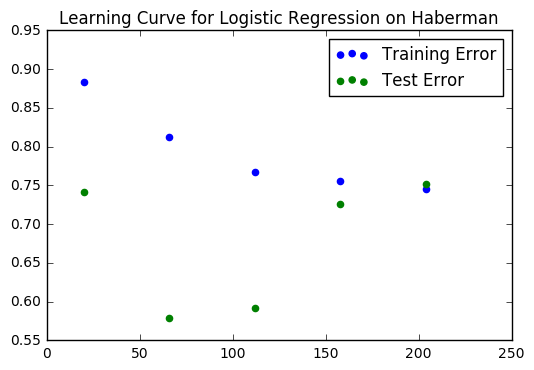

In [375]:
plt.scatter(m, train_cv_err, color='b', label='Training Error')
plt.scatter(m, test_cv_err, color='g', label='Test Error')
plt.title('Learning Curve for Logistic Regression on Haberman')
plt.legend()